# Importing libraries

In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

# Defining data paths

In [2]:
train_path = 'C:/Users/Adil Ahmed/Desktop/ear drum/train_data'
test_path = 'C:/Users/Adil Ahmed/Desktop/ear drum/test_data'
val_path = 'C:/Users/Adil Ahmed/Desktop/ear drum/vali_data'


# Converting image to pixels

Aom


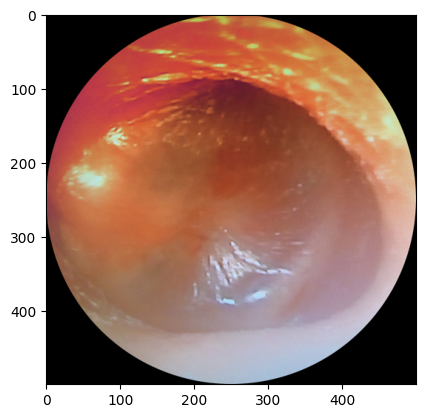

Chornic


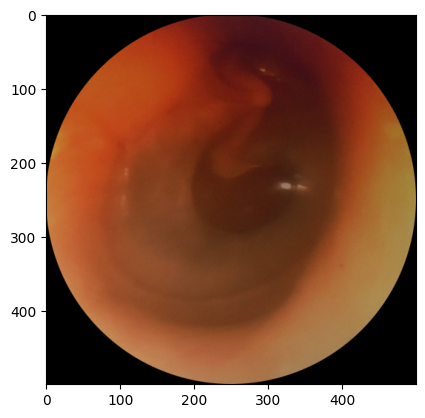

Earwax


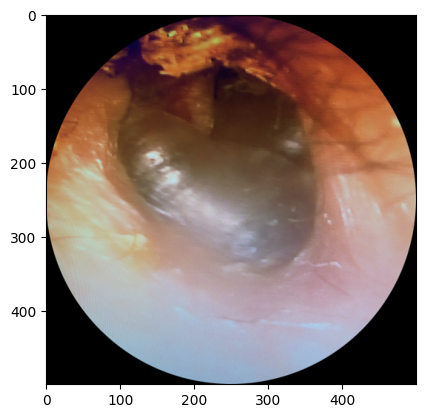

Foreign


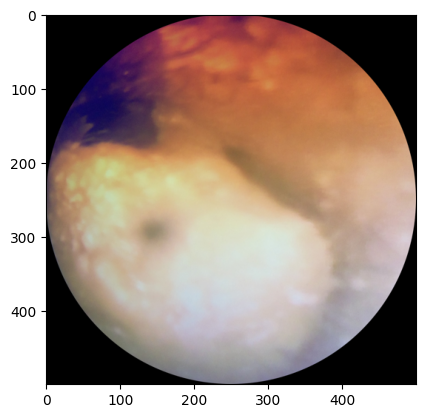

Normal


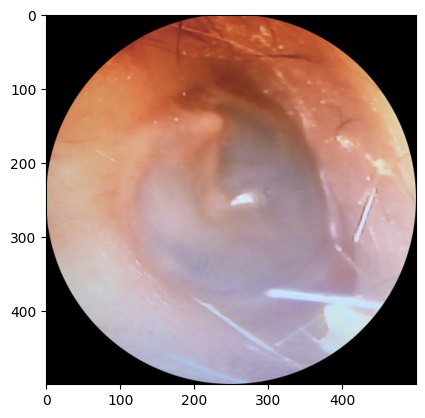

OME


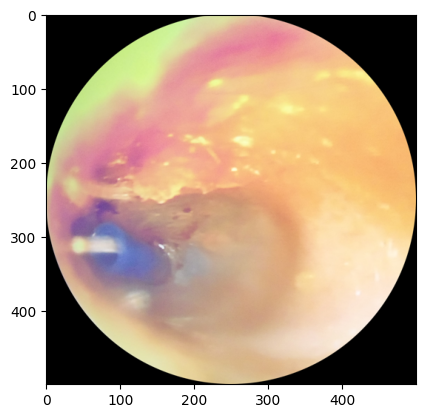

OtitExterna


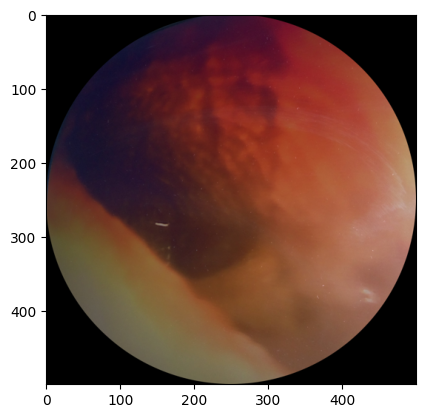

PseduoMembran


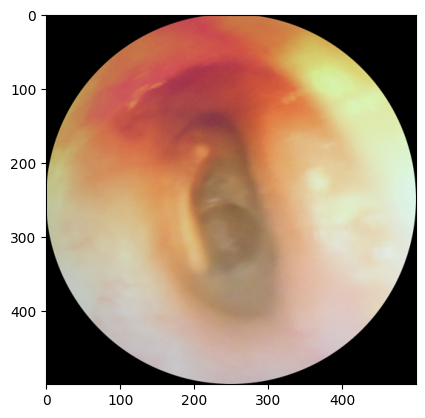

tympanoskleros


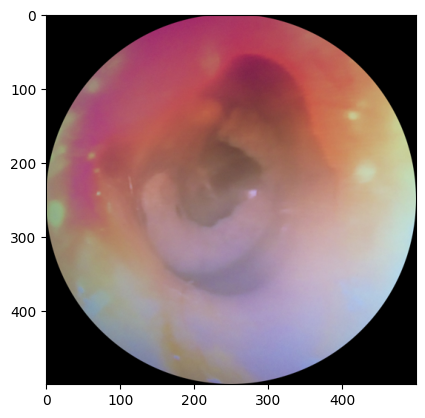

In [3]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    print(folder)
    temp_path = os.listdir(sub_path)[1]
    temp_path = sub_path + "/" + temp_path
    img = mpimg.imread(temp_path)
    imgplot = plt.imshow(img)
    plt.show()

In [4]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+"/"+img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [5]:
size = (250,250)

train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)



# Normalization

In [6]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

# Defining target variables 

In [8]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [9]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path,size,'sparse')

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\preprocessing\image.py:193: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 899 images belonging to 9 classes.
Found 574 images belonging to 9 classes.
Found 56 images belonging to 9 classes.


In [10]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [11]:
train_class.class_indices

{'Aom': 0,
 'Chornic': 1,
 'Earwax': 2,
 'Foreign': 3,
 'Normal': 4,
 'OME': 5,
 'OtitExterna': 6,
 'PseduoMembran': 7,
 'tympanoskleros': 8}

In [12]:
y_train.shape,y_test.shape,y_val.shape

((899,), (574,), (56,))

# VGG19 Model

In [13]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

In [14]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(9, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [15]:
Early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 10)

In [16]:
VGG = model.fit(x_train, y_train, validation_data =(x_val,y_val), epochs = 20,callbacks=[Early_stop],batch_size = 30)

Epoch 1/20
30/30 [==============================] - 420s 14s/step - loss: 2.2559 - accuracy: 0.5428 - val_loss: 3.3701 - val_accuracy: 0.2857
Epoch 2/20
30/30 [==============================] - 402s 13s/step - loss: 1.0731 - accuracy: 0.6440 - val_loss: 2.5607 - val_accuracy: 0.2857
Epoch 3/20
30/30 [==============================] - 404s 13s/step - loss: 0.9163 - accuracy: 0.7108 - val_loss: 2.0872 - val_accuracy: 0.3750
Epoch 4/20
30/30 [==============================] - 401s 13s/step - loss: 0.7648 - accuracy: 0.7408 - val_loss: 2.7971 - val_accuracy: 0.3393
Epoch 5/20
30/30 [==============================] - 401s 13s/step - loss: 0.7796 - accuracy: 0.7608 - val_loss: 3.5436 - val_accuracy: 0.3036
Epoch 6/20
30/30 [==============================] - 400s 13s/step - loss: 0.7279 - accuracy: 0.7809 - val_loss: 2.0338 - val_accuracy: 0.4821
Epoch 7/20
30/30 [==============================] - 404s 13s/step - loss: 0.5489 - accuracy: 0.8298 - val_loss: 1.5650 - val_accuracy: 0.5536
Epoch 

# Visualization

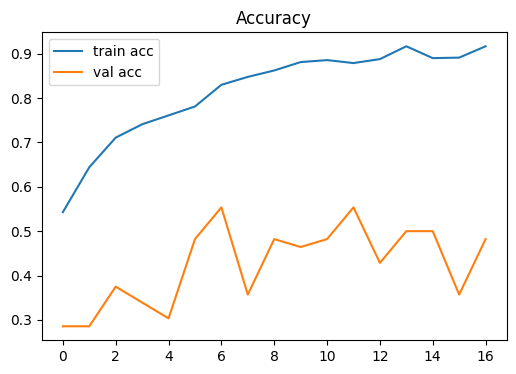

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(VGG.history['accuracy'], label='train acc')
plt.plot(VGG.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

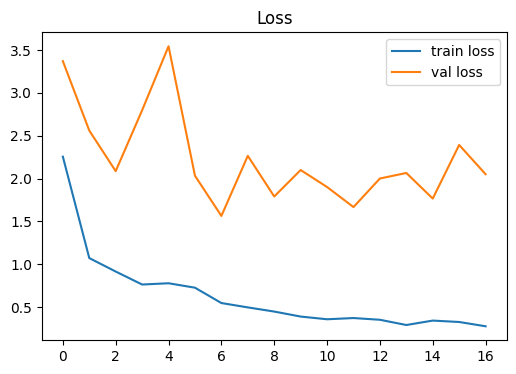

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(VGG.history['loss'], label='train loss')
plt.plot(VGG.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

# Model Evaluation

In [19]:
model.evaluate(x_test, y_test, batch_size=32)

18/18 [==============================] - 241s 13s/step - loss: 0.2257 - accuracy: 0.9530


[0.22573788464069366, 0.9529616832733154]

In [20]:
y_pred = model.predict(x_test)


18/18 [==============================] - 248s 14s/step


In [21]:
y_pred=np.argmax(y_pred,axis=1)


In [22]:
print(confusion_matrix(y_test,y_pred))
print('\n')

[[ 16   0   1   0   7   0   0   0   0]
 [  0  15   0   0   0   0   0   0   0]
 [  1   1  63   0   5   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0]
 [  0   4   0   0 406   0   0   1   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   3   0   0   3   0  21   0   0]
 [  0   0   0   0   0   0   0   5   0]
 [  0   0   0   0   1   0   0   0  14]]




In [23]:
print('Accuracy : %.3f' %accuracy_score(y_test,y_pred))

result1 = round((accuracy_score(y_test,y_pred)),3)
result1

Accuracy : 0.953


0.953

In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78        17
           1       1.00      0.65      0.79        23
           2       0.90      0.98      0.94        64
           3       1.00      1.00      1.00         2
           4       0.99      0.96      0.97       422
           5       1.00      1.00      1.00         5
           6       0.78      1.00      0.88        21
           7       1.00      0.83      0.91         6
           8       0.93      1.00      0.97        14

    accuracy                           0.95       574
   macro avg       0.92      0.93      0.91       574
weighted avg       0.96      0.95      0.95       574



In [25]:
from sklearn.metrics import classification_report

# Calculate classification report including overall specificity and sensitivity
report = classification_report(y_pred,y_test, digits=4, output_dict=True)

# Extract overall specificity and sensitivity (averaged across all classes)
overall_specificity = report['macro avg']['recall']
overall_sensitivity = report['macro avg']['precision']

# Print the results
print(f"Overall Specificity: {overall_specificity:.4f}")
print(f"Overall Sensitivity: {overall_sensitivity:.4f}")


Overall Specificity: 0.9303
Overall Sensitivity: 0.9184


# Confusion Matrix

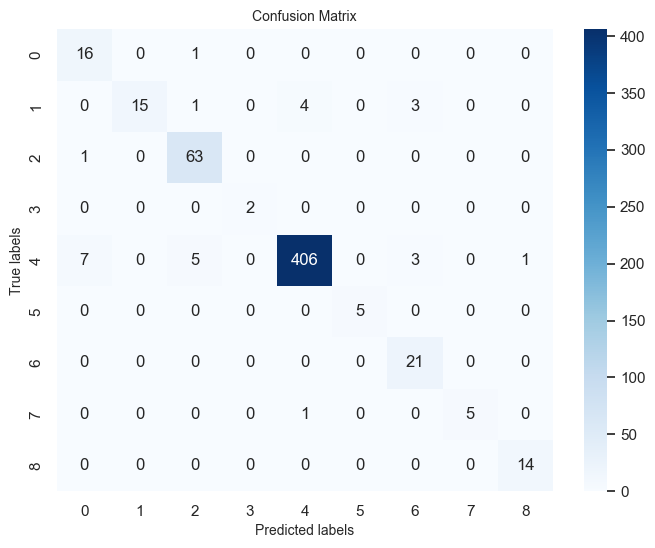

In [27]:
conf_matrix = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues", ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10); 
ax.set_title('Confusion Matrix', fontsize=10); 
ax.xaxis.set_ticklabels(['AOM', 'Chronic', 'Earwax', 'Foreign', 'Normal', 'OME', 'Otitis Externa', 'PseudoMembrane', 'Tympanosclerosis'], fontsize=8); ax.yaxis.set_ticklabels(['AOM', 'Chronic', 'Earwax', 'Foreign', 'Normal', 'OME', 'Otitis Externa', 'PseudoMembrane', 'Tympanosclerosis'], fontsize=8);

In [28]:
model.save("modelVGG19.h5")

# Random forest Model 

In [29]:
# This just for the One type of Diagnose i have colleted the Data for it .
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# importing the dataset

In [30]:
df= pd.read_csv('C:/Users/Adil Ahmed/Documents/capstone project/dataset/Book.csv')

In [31]:
X= df.drop(columns=['classification'], axis=1)
#X=x[:10]
y= df['classification']
#y=Y[:10]

In [32]:
X

,pressure(peak),Compilance (peak)
0,5,0.49
1,-10,0.40
2,5,0.68
3,30,0.66
4,0,0.54
5,-3,17.00
6,16,0.23
7,0,0.32
8,-35,0.39
9,125,0.25


In [33]:
y

0     A
1     A
2     A
3     A
4     A
5     C
6     C
7     C
8     C
9     C
10    C
11    c
12    C
13    A
14    A
15    A
16    A
17    A
18    A
19    A
20    A
21    A
22    A
23    A
24    A
25    A
26    A
27    A
28    A
29    A
30    A
31    A
32    A
33    A
34    A
35    A
36    A
37    A
38    A
39    A
40    A
41    A
42    B
43    B
44    B
45    B
46    B
47    C
48    C
49    B
50    B
51    A
52    A
53    B
54    B
55    A
56    A
57    B
Name: classification, dtype: object

# splitting the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Random forest Model 

In [35]:
rf= RandomForestClassifier(criterion='gini',n_estimators=30,random_state=25,n_jobs=5)

In [36]:
rf.fit(X_train,y_train)

prediction= rf.predict(X_test)
print('Accuracy : %.3f' %accuracy_score(y_test,prediction))

result2 = round(accuracy_score(y_test,prediction),3)
result2

Accuracy : 0.917


0.917

In [37]:
print(confusion_matrix(y_test,prediction))
print('\n')


[[8 0 1]
 [0 2 0]
 [0 0 1]]




In [38]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           A       1.00      0.89      0.94         9
           B       1.00      1.00      1.00         2
           C       0.50      1.00      0.67         1

    accuracy                           0.92        12
   macro avg       0.83      0.96      0.87        12
weighted avg       0.96      0.92      0.93        12



# Import necessary libraries
#from sklearn.metrics import confusion_matrix

# Define actual and predicted values
y_true = int(y_test)
y_pred = int(prediction)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print sensitivity and specificity
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


# for muulticlassification model this the over-all specificity := 

In [39]:

from sklearn.metrics import classification_report

# Calculate classification report including overall specificity and sensitivity
report = classification_report(y_test,prediction, digits=4, output_dict=True)

# Extract overall specificity and sensitivity (averaged across all classes)
overall_specificity = report['macro avg']['recall']
overall_sensitivity = report['macro avg']['precision']

# Print the results
print(f"Overall Specificity: {overall_specificity:.4f}")
print(f"Overall Sensitivity: {overall_sensitivity:.4f}")


Overall Specificity: 0.9630
Overall Sensitivity: 0.8333



# Fusion methodology

In [40]:
def simple_average(results):
    n = len(results)
    fused_result = sum(results) / n
    return fused_result


In [41]:
results = [result1,result2]
fused_result = simple_average(results)
print(fused_result)



0.935
